In [1]:
import pandas as pd
import numpy as np

from Preprocessing_makers import preprocess_fg

from tracking_query import get_play

In [2]:
plays = pd.read_csv('Data/nfl-big-data-bowl-2022/plays.csv')
games = pd.read_csv('Data/nfl-big-data-bowl-2022/games.csv')
tracking2018 = pd.read_csv('Data/nfl-big-data-bowl-2022/tracking2018.csv')
#tracking2019 = pd.read_csv('Data/nfl-big-data-bowl-2022/tracking2019.csv')
#tracking2020 = pd.read_csv('Data/nfl-big-data-bowl-2022/tracking2020.csv')

In [3]:
tracking_dict = {
    2018: tracking2018,
    2019: tracking2019,
    2020: tracking2020
}

In [153]:
def game_season(game_id, games):
    return games[games['gameId']==game_id]['season'].values[0]

In [150]:
fg = plays[plays['specialTeamsPlayType'] == 'Field Goal']

In [155]:
fg['season'] = fg['gameId'].apply(lambda x: game_season(x, games))

/tmp/ipykernel_5690/2347118303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fg['season'] = fg['gameId'].apply(lambda x: game_season(x, games))


In [7]:
fg2018 = fg[fg['season']==2018]

In [8]:
fg_games = tracking2018[tracking2018['gameId'].isin(fg2018['gameId'])]
fg_plays = fg_games[fg_games['playId'].isin(fg2018['playId'])]
fg_plays_ball = fg_plays[fg_plays['displayName'] == 'football']

In [9]:
play_example = fg_plays_ball[(fg_plays_ball['gameId']==2018123000) & (fg_plays_ball['playId']==2314)]

In [107]:
def x_within_fg_bounds(x):
    return ((x>118) & (x<122)) | ((x>-2) & (x<2))

In [132]:
within_bounds = play_example[x_within_fg_bounds(play_example['x'])]

id1 = len(within_bounds) // 2 - 1
id2 = (len(within_bounds) // 2) if (len(within_bounds) % 2 == 0) else (len(within_bounds) // 2 - 1)

first_y = within_bounds.iloc[id1]['y']
last_y = within_bounds.iloc[id2]['y']

first_x = within_bounds.iloc[id1]['x']
last_x = within_bounds.iloc[id2]['x']

mean_y = (first_y + last_y) / 2
mean_x = (first_x + last_x) / 2

In [136]:
within_bounds = play_example[x_within_fg_bounds(play_example['x'])]

first_y = within_bounds.iloc[0]['y']
last_y = within_bounds.iloc[1]['y']

first_x = within_bounds.iloc[0]['x']
last_x = within_bounds.iloc[1]['x']

mean_y = (first_y + last_y) / 2
mean_x = (first_x + last_x) / 2

In [117]:
within_bounds

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
29248,2018-12-30T22:53:49.300,118.91,30.58,8.40,3.56,0.97,NaN,NaN,None,NaN,football,NaN,NaN,football,56,2018123000,2314,right
29249,2018-12-30T22:53:49.400,119.98,30.76,7.67,5.03,1.09,NaN,NaN,None,NaN,football,NaN,NaN,football,57,2018123000,2314,right
29250,2018-12-30T22:53:49.500,120.86,30.88,7.22,4.99,0.88,NaN,NaN,None,NaN,football,NaN,NaN,football,58,2018123000,2314,right
29251,2018-12-30T22:53:49.600,121.59,30.98,6.80,4.33,0.74,NaN,NaN,None,NaN,football,NaN,NaN,football,59,2018123000,2314,right


In [137]:
def get_fieldgoal_y_pos(game_id, play_id, tracking):

    play_example = get_play(game_id, play_id, tracking)

    try:

        within_bounds = play_example[x_within_fg_bounds(play_example['x'])]

        id1 = len(within_bounds) // 2 - 1
        id2 = (len(within_bounds) // 2) if (len(within_bounds) % 2 == 0) else (len(within_bounds) // 2 - 1)

        first_y = within_bounds.iloc[id1]['y']
        last_y = within_bounds.iloc[id2]['y']

        mean_y = (first_y + last_y) / 2
    
    except:
        mean_y = np.nan

    return mean_y

In [138]:
fg['fieldgoal_y'] = fg.index.map(lambda x: get_fieldgoal_y_pos(fg.loc[x]['gameId'], fg.loc[x]['playId'], tracking_dict[fg.loc[x]['season']]))

/tmp/ipykernel_3794/123015229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fg['fieldgoal_y'] = fg.index.map(lambda x: get_fieldgoal_y_pos(fg.loc[x]['gameId'], fg.loc[x]['playId'], tracking_dict[fg.loc[x]['season']]))


In [139]:
fg['fieldgoal_y']

2        26.625
6        27.925
8        25.735
33       29.420
36       23.475
          ...  
19952    25.720
19955    27.795
19959    28.385
19962    26.660
19965    26.580
Name: fieldgoal_y, Length: 2657, dtype: float64

In [140]:
fg['fieldgoal_y'].isna().sum()

77

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [142]:
fg['fieldgoal_y'].mean() - (160/6)

0.09298449612403203

In [143]:
center = 160 / 6
radius = 37/12

/home/kenneth/anaconda3/envs/nfl-env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


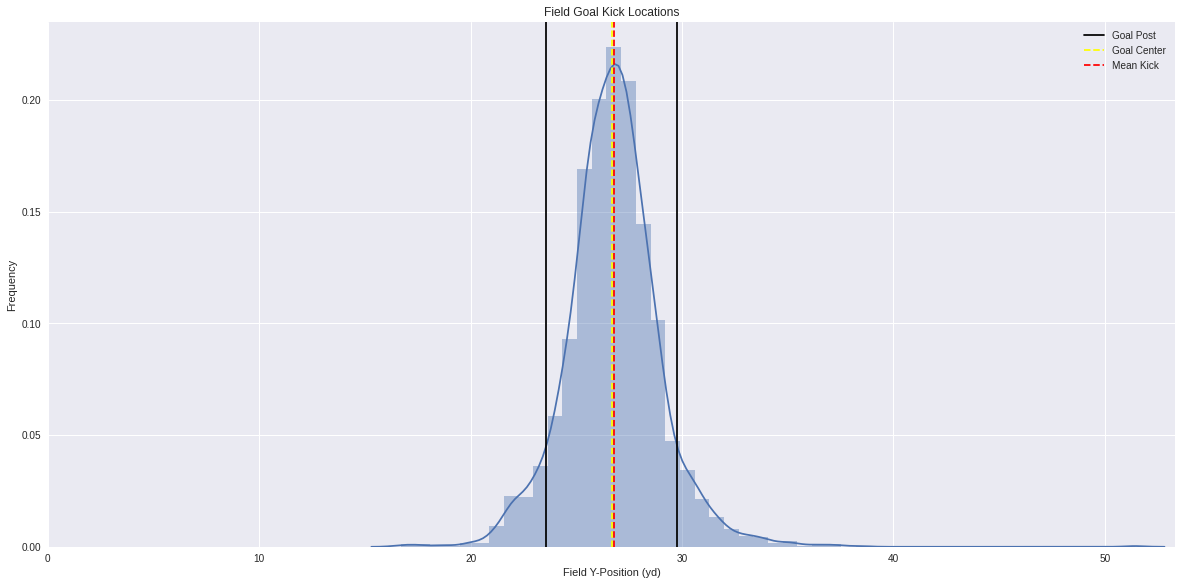

In [144]:
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
sns.distplot(fg['fieldgoal_y'])
plt.xlim(0,160/3)
plt.axvline(x=center-radius, color='black', label='Goal Post')
plt.axvline(x=center+radius, color='black')
plt.axvline(x=160/6, color='yellow', label='Goal Center', linestyle='--')
plt.axvline(x=fg['fieldgoal_y'].mean(), color='red', label='Mean Kick', linestyle='--')
plt.legend(loc='upper right')
plt.xlabel('Field Y-Position (yd)')
plt.ylabel('Frequency')
plt.title('Field Goal Kick Locations')
plt.savefig('field_goal_dist.png')

In [145]:
fg['fieldgoal_y'].std()

2.244203151328016

In [146]:
radius

3.0833333333333335

In [147]:
low = stats.percentileofscore(fg['fieldgoal_y'], center-radius)
high = stats.percentileofscore(fg['fieldgoal_y'], center+radius)

In [148]:
high-low

83.77869777945051

## Approximating Kick Trajectories

In [95]:
def get_play(game_id, play_id, tracking, event):
    '''
    This function creates the tracking dataframes.

    Parameters:
    -----------
    game_id, play_id - game and play of interest
    tracking - tracking dataframe the that game and play are in
    event - string of the event that we want to find, i.e., 'extra_point_attempt'
    ...

    Returns:
    -----------
    play - dataframe of just the tracking data for the particular play of interest
    event_df - 11-row dataframe of tracking data around the event
    '''
    game = tracking[tracking['gameId'] == game_id]
    play = game[game['playId'] == play_id]
    ball = play[play['displayName']=='football']

    index = ball.index[ball['event']== event].values[0]
    event_df = ball.loc[index-5:index+5,:]
    
    return play, event_df

In [4]:
def find_kickline(event_df):
    '''
    This function gives a straightline expectation of where the football crosses the endzone.

    Parameters:
    -----------
    event_df - 11-row dataframe of tracking data around the event (from get_play)
    ...
    finds max_index where velocity is highest and uses the x & y values from max_index
    and max_index+1 to calculate a straight line trajectory of the football

    Returns:
    -----------
    y value expectation of football at x=120
    '''
    max_index = event_df['s'].idxmax()
    
    x1 = event_df['x'][max_index]
    y1 = event_df['y'][max_index]
    x2 = event_df['x'][max_index+1]
    y2 = event_df['y'][max_index+1]
    
    m = (y2-y1)/(x2-x1)
    
    return m*(120-x1)+y1

## Computing Player Density (Core Distance)

In [96]:
def l2_norm(x1, y1, x2, y2):
    # Computes euclidean distance between two points
    return np.sqrt(np.square(x1-x2) + np.square(y1-y2))

In [97]:
def get_opposing_team(kicking_team):
    # Returns label of opposing team
    return 'home' if kicking_team == 'away' else 'away'

In [112]:
def compute_kicker_core_dist(game_id, play_id, tracking, k=5):
    '''
    Compute core distance from kicker to players on opposing team

    Parameters:
    -----------
    game_id - gameId of play
    play_id - playId of play
    tracking - Tracking data containing relevant play
    k - Number of nearest neighbors to check (returns distance of k-th nearest player)

    Returns:
    --------
    core_distance - The core distance from kicker to players on opposing team

    '''

    # TO-DO:
    #   - update function to make use of new get_play and get_event functions

    # Get play and event data
    play, event_df = get_play(game_id, play_id, tracking, 'field_goal_attempt')
    
    # Get kick event by finding max ball speed
    kick_idx = event_df['s'].idxmax()
    
    # Get all play data at the time of the kick
    kick_frame = play.loc[kick_idx]['frameId']
    kick_tracking = play[play['frameId']==kick_frame]

    # Get data from players on opposing team
    kicking_team = kick_tracking[kick_tracking['position']=='K']['team'].values[0]
    opposing_team = get_opposing_team(kicking_team)
    opposing_team_players = kick_tracking[kick_tracking['team']==opposing_team]

    # Get kicker x and y coords
    kicker_x = kick_tracking[kick_tracking['position']=='K']['x'].values[0]
    kicker_y = kick_tracking[kick_tracking['position']=='K']['y'].values[0]

    # Compute Euclidean distances from kicker to players on opposing team
    opposing_team_players['kicker_dist'] = l2_norm(kicker_x, kicker_y, opposing_team_players['x'], opposing_team_players['y'])

    # Sort distances, grab k-th nearest distance (the core distance)
    sorted_distances = opposing_team_players['kicker_dist'].sort_values()
    core_distance = sorted_distances.iloc[k-1]

    return core_distance
    

## Checking Play Data Quality (Field Goals)

In [284]:
#play_example, event_df = get_play(2018123000, 2314, tracking2018, 'field_goal_attempt')
play_example, event_df = get_play(2018122201, 2756, tracking2018, 'field_goal_attempt')
#play_example, event_df = get_play(2018090905, 848, tracking2018, 'field_goal_attempt')
#play_example, event_df = get_play(2018110405, 3517, tracking2018, 'field_goal_attempt')
#play_example, event_df = get_play(2018091610, 473, tracking2018, 'field_goal_attempt')


In [285]:
ball = play_example[play_example['team']=='football']

In [286]:
snap_idx = ball[ball['event']=='ball_snap'].index[0]
fga_idx = ball[ball['event']=='field_goal_attempt'].index[0]
fgm_idx = ball[ball['event']=='field_goal'].index[0]

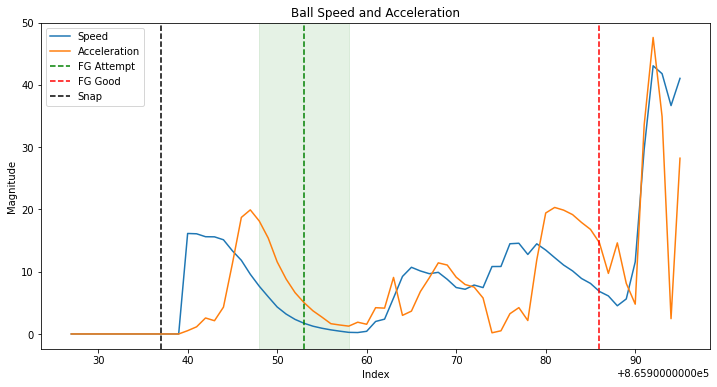

In [287]:
plt.figure(figsize=(12,6))
plt.plot(ball['s'], label='Speed')
plt.plot(ball['a'], label='Acceleration')
plt.axvline(x=fga_idx, color='green', linestyle='--', label='FG Attempt')
plt.axvline(x=fgm_idx, color='red', linestyle='--', label='FG Good')
plt.axvline(x=snap_idx, color='black', linestyle='--', label='Snap')
plt.axvspan(fga_idx-5, fga_idx+5, color='green', alpha=0.1)
plt.title('Ball Speed and Acceleration')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
#plt.savefig('event_vs_ball_sa.png')

In [258]:
# This is bad code. Don't use this, and tell no one I ever wrote this...
def get_kick_attempt_idx_diff(game_id, play_id, tracking, event):
    try:
        play, event_df = get_play(game_id, play_id, tracking, event)
        ball = play[play['team']=='football']
        fga_idx = ball[ball['event']==event].index[0]
        max_speed_idx = ball['s'].idxmax()

        idx_diff = np.abs(fga_idx - max_speed_idx)

        return idx_diff
    except:
        return np.nan

In [121]:
tracking2018

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12777346,2018-09-11T05:25:17.800,123.18,51.73,3.76,1.45,0.29,NaN,NaN,None,NaN,football,NaN,NaN,football,59,2018091001,4033,right
12777347,2018-09-11T05:25:17.900,123.40,51.89,3.19,3.02,0.28,NaN,NaN,None,NaN,football,NaN,NaN,football,60,2018091001,4033,right
12777348,2018-09-11T05:25:18.000,123.55,52.18,2.95,3.88,0.32,NaN,NaN,None,NaN,football,NaN,NaN,football,61,2018091001,4033,right
12777349,2018-09-11T05:25:18.100,123.67,52.50,3.01,4.53,0.34,NaN,NaN,None,NaN,football,NaN,NaN,football,62,2018091001,4033,right


In [156]:
fg2018 = fg[fg['season']==2018]

In [259]:
fg2018['index_diff'] = fg2018.index.map(lambda x: get_kick_attempt_idx_diff(fg.loc[x]['gameId'], fg.loc[x]['playId'], tracking2018, 'field_goal_attempt'))

/tmp/ipykernel_5690/1757950116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fg2018['index_diff'] = fg2018.index.map(lambda x: get_kick_attempt_idx_diff(fg.loc[x]['gameId'], fg.loc[x]['playId'], tracking2018, 'field_goal_attempt'))


<AxesSubplot:>

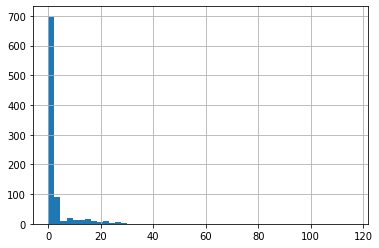

In [161]:
fg2018['index_diff'].hist(bins=50)

In [164]:
fg2018['index_diff'].describe()

count    897.000000
mean       3.083612
std        6.311725
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      116.000000
Name: index_diff, dtype: float64

In [172]:
stats.percentileofscore(fg2018['index_diff'], )

89.92248062015504

In [176]:
fg2018[fg2018['index_diff'] == fg2018['index_diff'].max()]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,season,index_diff
876,2018092301,1721,(4:45) (Field Goal formation) J.Tucker 43 yard...,2,4,7,BAL,Field Goal,Blocked Kick Attempt,39470.0,...,10.0,17,14,NaN,NaN,NaN,-26,35,2018,116.0


In [178]:
fg2018_attempts = fg2018[fg2018['specialTeamsResult'].isin(['Kick Attempt Good', 'Kick Attempt No Good'])]

<AxesSubplot:>

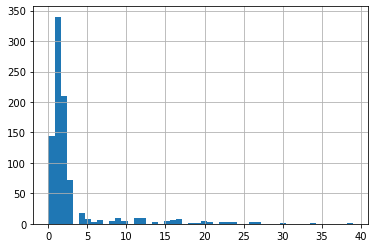

In [185]:
fg2018_attempts['index_diff'].hist(bins=50)

In [186]:
fg2018_attempts['index_diff'].describe()

count    889.000000
mean       2.914511
std        5.031153
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       39.000000
Name: index_diff, dtype: float64

In [189]:
fg2018_attempts['index_diff'].quantile(.9)

7.2000000000000455

In [232]:
stats.percentileofscore(fg2018_attempts['index_diff'], 8)

90.1685393258427

In [225]:
fg2018_attempts[fg2018_attempts['index_diff'] == 7]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,season,index_diff
658,2018091610,473,"(6:22) R.Gould 45 yard field goal is GOOD, Cen...",1,4,27,SF,Field Goal,Kick Attempt Good,30403.0,...,NaN,0,0,NaN,45.0,NaN,0,37,2018,7.0
1435,2018093006,542,(5:30) S.Gostkowski 20 yard field goal is GOOD...,1,4,2,NE,Field Goal,Kick Attempt Good,30932.0,...,NaN,0,0,NaN,20.0,NaN,0,12,2018,7.0
3274,2018110100,1910,"(:21) R.Gould 39 yard field goal is GOOD, Cent...",2,4,8,SF,Field Goal,Kick Attempt Good,30403.0,...,NaN,14,3,NaN,39.0,NaN,0,89,2018,7.0
3564,2018110410,748,"(5:08) M.Crosby 29 yard field goal is GOOD, Ce...",1,4,11,GB,Field Goal,Kick Attempt Good,32386.0,...,NaN,7,0,NaN,29.0,NaN,0,21,2018,7.0
4489,2018112502,1885,"(:01) G.Gano 25 yard field goal is GOOD, Cente...",2,4,7,CAR,Field Goal,Kick Attempt Good,35102.0,...,NaN,10,10,NaN,25.0,NaN,0,103,2018,7.0
6273,2018122310,4796,"(:03) J.Elliott 35 yard field goal is GOOD, Ce...",4,3,8,PHI,Field Goal,Kick Attempt Good,44966.0,...,NaN,29,30,NaN,35.0,NaN,0,93,2018,7.0


In [204]:
from play_animation import animate_play

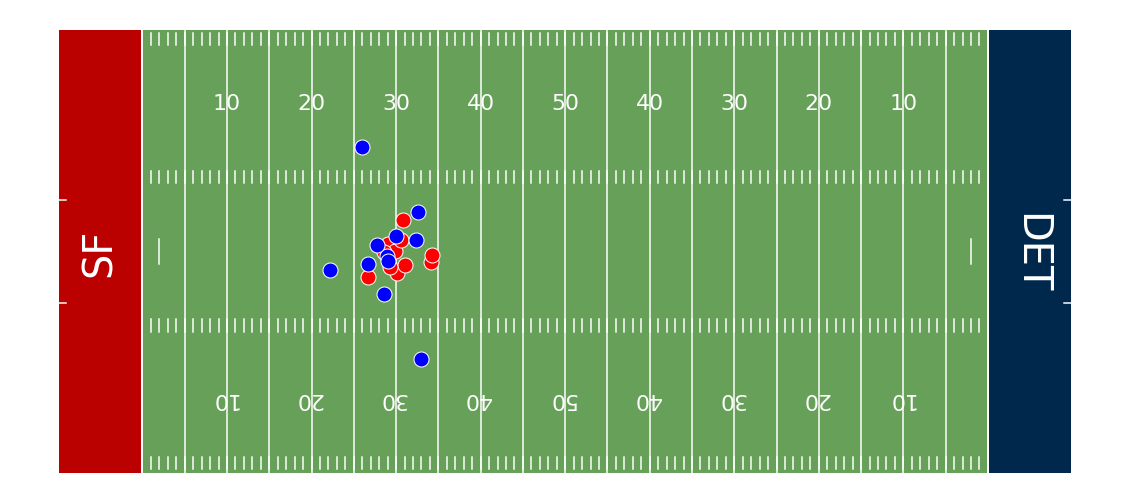

In [231]:
animate_play(2018091610, 473, tracking2018, games=games, save_to='weird_play.mp4')

## Checking Play Data Quality (Extra Points)

In [233]:
ep = plays[plays['specialTeamsPlayType'] == 'Extra Point']
ep['season'] = ep['gameId'].apply(lambda x: game_season(x, games))
ep2018 = ep[ep['season']==2018]

/tmp/ipykernel_5690/2875678876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ep['season'] = ep['gameId'].apply(lambda x: game_season(x, games))


In [246]:
ep2018['index_diff'] = ep2018.index.map(lambda x: get_kick_attempt_idx_diff(ep2018.loc[x]['gameId'], ep2018.loc[x]['playId'], tracking2018, 'extra_point_attempt'))

/tmp/ipykernel_5690/4080750428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ep2018['index_diff'] = ep2018.index.map(lambda x: get_kick_attempt_idx_diff(ep2018.loc[x]['gameId'], ep2018.loc[x]['playId'], tracking2018, 'extra_point_attempt'))


<AxesSubplot:>

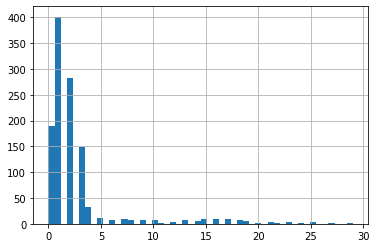

In [247]:
ep2018['index_diff'].hist(bins=50)

In [248]:
ep2018['index_diff'].describe()

count    1179.000000
mean        2.750636
std         4.305669
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        29.000000
Name: index_diff, dtype: float64

In [249]:
ep2018['index_diff'].quantile(.9)

5.0

In [250]:
stats.percentileofscore(ep2018['index_diff'], 7)

90.80168776371308

In [251]:
ep2018[ep2018['index_diff']==ep2018['index_diff'].max()]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,season,index_diff
5987,2018122200,1426,"D.Hopkins extra point is GOOD, Center-A.East, ...",2,0,0,WAS,Extra Point,Kick Attempt Good,40125.0,...,NaN,6,9,NaN,NaN,NaN,0,25,2018,29.0


In [252]:
play, event_df = get_play(2018122200, 1426, tracking2018, 'extra_point_attempt')
ball = play[play['team']=='football']

In [255]:
epa_idx = ball[ball['event']=='extra_point_attempt'].index[0]

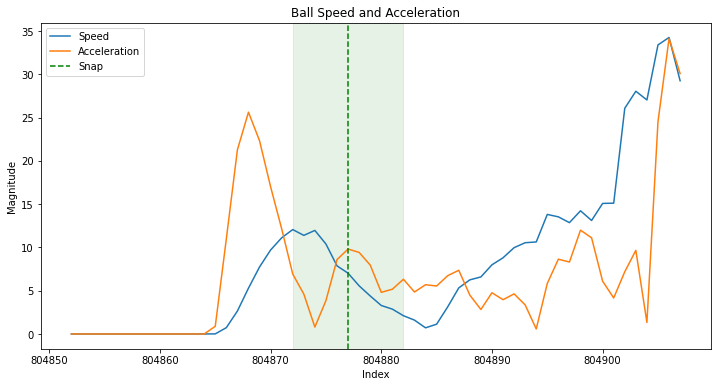

In [256]:
plt.figure(figsize=(12,6))
plt.plot(ball['s'], label='Speed')
plt.plot(ball['a'], label='Acceleration')
plt.axvline(x=epa_idx, color='green', linestyle='--', label='Snap')
plt.axvspan(epa_idx-5, epa_idx+5, color='green', alpha=0.1)
plt.title('Ball Speed and Acceleration')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
#plt.savefig('event_vs_ball_sa_ep.png')

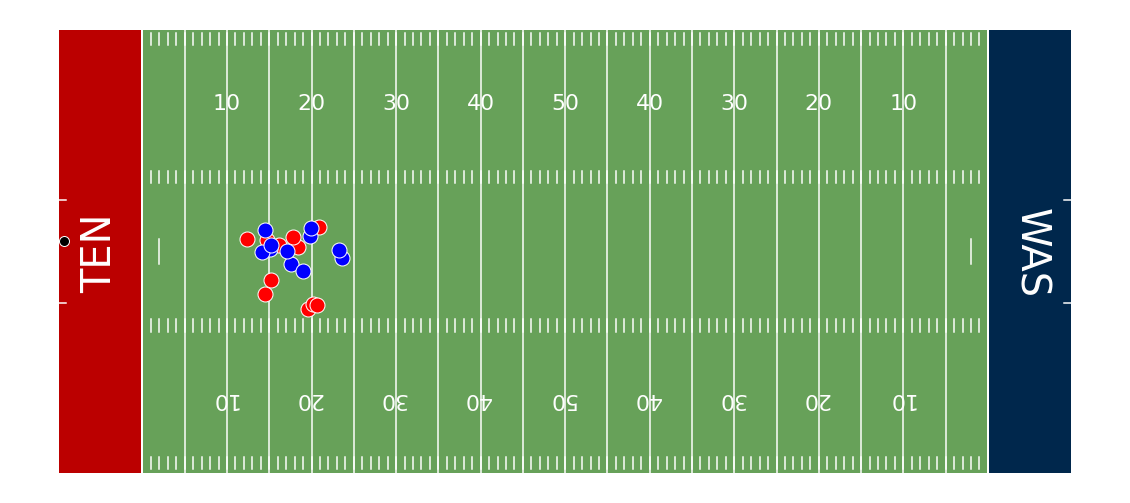

In [257]:
animate_play(2018122200, 1426, tracking2018, games=games, save_to='weird_play_ep.mp4')

## Writing a Pre-Processing Function for Index Difference

Below are all of the functions used in the final pre-processing step, `drop_by_index_difference`. Some are copied from elsewhere in the notebook.

In [293]:
# Copying this function from the repo so that the code below works with the code we have.

def get_play(game_id, play_id, tracking):
    '''
    This function creates the tracking dataframes.
    Parameters:
    -----------
    game_id, play_id - game and play of interest
    tracking - tracking dataframe the that game and play are in
    ...
    Returns:
    -----------
    play - dataframe of just the tracking data for the particular play of interest
    '''
    game = tracking[tracking['gameId'] == game_id]
    play = game[game['playId'] == play_id]
    
    return play

In [313]:
def get_kick_attempt_idx_diff(game_id, play_id, tracking, event):
    '''
    For a given gameId and playId, return the difference in index between the event as labelled and the maximum speed of the ball.

    Parameters:
    -----------
    game_id - gameId of play
    play_id - playId of play
    tracking - Tracking data containing play
    event - The event type to compute an index difference for

    Returns:
    --------
    idx_diff - The difference in index between the labelled event and the max speed of the ball

    '''
    # get play and football data
    play = get_play(game_id, play_id, tracking)
    ball = play[play['team']=='football']

    # Return null if desired event not present
    if event not in ball['event'].values:
        return np.nan

    # Compute event index and max ball speed index
    event_idx = ball[ball['event']==event].index[0]
    max_speed_idx = ball['s'].idxmax()

    # Compute difference in indices
    idx_diff = np.abs(event_idx - max_speed_idx)

    return idx_diff

In [314]:
def drop_by_index_difference(play_df, tracking, event, threshold=7):
    '''
    Drop values from play DataFrame according to event-vs-max-speed index difference.

    Parameters:
    -----------
    play_df - DataFrame containing data for a specific play type (e.g. field goals, extra points)
    tracking - Tracking data relevant to the provided plays
    event - The event type to compute index difference for

    Returns:
    --------
    filtered_play_df - play_df with rows dropped according to index difference threshhold

    '''

    # Create a pandas Series of index differences
    index_diff = play_df.index.map(
        lambda x: get_kick_attempt_idx_diff(
            play_df.loc[x]['gameId'],
            play_df.loc[x]['playId'],
            tracking,
            event
        )
    )

    index_diff = pd.Series(index_diff, index=play_df.index)

    # Filter using the above series as a boolean mask
    filtered_play_df = play_df[index_diff <= threshold]

    return filtered_play_df

In [315]:
filtered_df = drop_by_index_difference(ep2018, tracking2018, 'extra_point_attempt')

In [316]:
filtered_df

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,season,index_diff
15,2018090600,2883,"J.Elliott extra point is GOOD, Center-R.Lovato...",3,0,0,PHI,Extra Point,Kick Attempt Good,44966.0,...,NaN,9,6,NaN,NaN,NaN,0,25,2018,1.0
19,2018090600,3553,"M.Bryant extra point is No Good, Hit Right Upr...",4,0,0,ATL,Extra Point,Kick Attempt No Good,27091.0,...,NaN,10,12,NaN,NaN,NaN,0,25,2018,3.0
25,2018090900,380,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",1,0,0,BAL,Extra Point,Kick Attempt Good,39470.0,...,NaN,6,0,NaN,NaN,NaN,0,95,2018,1.0
30,2018090900,972,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",1,0,0,BAL,Extra Point,Kick Attempt Good,39470.0,...,NaN,13,0,NaN,NaN,NaN,0,95,2018,0.0
46,2018090900,2899,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",3,0,0,BAL,Extra Point,Kick Attempt Good,39470.0,...,NaN,39,0,NaN,NaN,NaN,0,25,2018,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6778,2018123014,3306,"G.Zuerlein extra point is GOOD, Center-J.McQua...",3,0,0,LA,Extra Point,Kick Attempt Good,38701.0,...,NaN,44,17,NaN,NaN,NaN,0,95,2018,1.0
6790,2018123015,874,"S.Janikowski extra point is GOOD, Center-T.Ott...",1,0,0,SEA,Extra Point,Kick Attempt Good,25326.0,...,NaN,6,3,NaN,NaN,NaN,0,25,2018,3.0
6792,2018123015,1208,"S.Janikowski extra point is GOOD, Center-T.Ott...",2,0,0,SEA,Extra Point,Kick Attempt Good,25326.0,...,NaN,13,3,NaN,NaN,NaN,0,95,2018,3.0
6796,2018123015,1611,"Z.Gonzalez extra point is GOOD, Center-A.Brewe...",2,0,0,ARI,Extra Point,Kick Attempt Good,45037.0,...,NaN,14,9,NaN,NaN,NaN,0,25,2018,3.0
